In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The code was removed by DSX for sharing.

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,8951,1745,1.74,65,6439,6.43,65,6511,6.51,65,...,0,0,0,0,0,0,0,0,0,0
1,8997,1515,1.51,67,1745,1.74,65,4503,4.50,67,...,0,0,0,0,0,0,0,0,0,0
2,9024,1745,1.74,65,6439,6.43,65,6511,6.51,65,...,0,0,0,0,0,0,0,0,0,0
3,9043,1745,1.74,65,6303,6.30,65,6439,6.43,65,...,0,0,0,0,0,0,0,0,0,0
4,9313,1745,1.74,65,6439,6.43,65,6511,6.51,65,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print df_data_1.shape

(482, 88)


In [4]:
mp_set = set([])
for i in np.arange(1,87, 3):
    df_data_1[i] = df_data_1[i].astype(int)
    tmp = set(df_data_1[i].unique())
    mp_set = mp_set | tmp 

mp_set = mp_set - set([0])
print "Il numero di materie prime è " + str(len(mp_set))

Il numero di materie prime è 375


In [5]:
gr_set = set([])
for i in np.arange(3,88, 3):
    df_data_1[i] = df_data_1[i].astype(int)
    tmp = set(df_data_1[i].unique())
    gr_set = gr_set | tmp
    
gr_set = gr_set - set([0])
print "Il numero di gruppi è " + str(len(gr_set))

Il numero di gruppi è 9


In [6]:
my_dict = {}

for index,row in df_data_1.iterrows():
    my_row = {}
    tmp = 0
    for i in np.arange(2,87, 3):
        tmp += row[i] 
        if row[i]!= 0:
            my_row[str(int(row[i-1]))+"_"+str(int(row[i+1]))] = row[i]
    my_dict[row[0]] = my_row
    
df_data2 = pd.DataFrame.from_dict(my_dict, 'index').fillna(0)
print df_data2.shape
df_data2.head()

(482, 650)


,32488_67,15015_65,6439_65,13709_65,16637_65,32322_66,15027_65,6303_65,1739_65,1745_65,...,34622_65,34545_65,34917_66,32597_67,35588_67,32912_51,34283_66,32938_67,32936_67,32579_67
8951,0,15.01,6.43,13.7,0,0.00,15.02,0.0,0,1.74,...,0,0,0,0,0,0,0,0,0,0
8997,0,0.00,0.00,0.0,0,0.00,0.00,0.0,0,1.74,...,0,0,0,0,0,0,0,0,0,0
9024,0,15.01,6.43,13.7,0,0.00,15.02,0.0,0,1.74,...,0,0,0,0,0,0,0,0,0,0
9043,0,15.01,6.43,13.7,0,32.32,15.02,6.3,0,1.74,...,0,0,0,0,0,0,0,0,0,0
9313,0,15.01,6.43,13.7,0,0.00,15.02,0.0,0,1.74,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_data2 = df_data2.div(df_data2.sum(axis= 1), axis= 0)

for index, row in df_data2.iterrows():
    if row.sum() != float(1.0) :
        print 'KO'
        print row.sum()

In [33]:
pca = PCA(n_components = df_data2.shape[1])
pca.fit(df_data2)
expl_var = np.array(pca.explained_variance_ratio_)
cum_expl_var = np.cumsum(expl_var)
print cum_expl_var

[ 0.11306963  0.16648004  0.21218549  0.25196749  0.29104976  0.3280705
  0.36222531  0.39296933  0.42277213  0.44579811  0.46739887  0.48652823
  0.50464541  0.52076207  0.53580302  0.55018222  0.56370628  0.57650199
  0.58781663  0.59867141  0.60912139  0.61855731  0.62770943  0.63625087
  0.64452859  0.6524386   0.65996862  0.667273    0.67439918  0.68122038
  0.68790119  0.69408411  0.70014532  0.70599773  0.7115013   0.71682632
  0.72215097  0.72726687  0.73219889  0.73705666  0.74188523  0.74659359
  0.7510443   0.75536425  0.75944766  0.76349804  0.76747087  0.77138081
  0.77517119  0.77890558  0.78262512  0.78634466  0.7900642   0.79377741
  0.79748657  0.80116177  0.80474483  0.80821648  0.81157007  0.81477232
  0.81790775  0.82094553  0.82380484  0.82656863  0.82925168  0.83191947
  0.8345252   0.83710902  0.83960859  0.84206619  0.84451367  0.84688972
  0.84922445  0.85148862  0.85367609  0.85582562  0.85791531  0.85999168
  0.8619846   0.86391852  0.86584683  0.86775123  0.

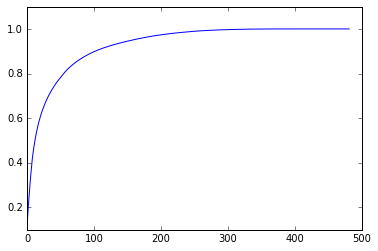

In [32]:
x = np.arange(cum_expl_var.shape[0])
y = cum_expl_var
plt.plot(x,y)

In [36]:
def num_components(cum_var, thrs):
    return (cum_var < thrs).sum()

In [37]:
print num_components(cum_expl_var, 0.94)
print num_components(cum_expl_var, 0.95)
print num_components(cum_expl_var, 0.96)
print num_components(cum_expl_var, 0.97)
print num_components(cum_expl_var, 0.98)
print num_components(cum_expl_var, 0.99)

143
157
173
193
217
253


In [38]:
pca = PCA(n_components = num_components(cum_expl_var, 0.97))
x_trasf = pca.fit_transform(df_data2)
expl_var = np.array(pca.explained_variance_ratio_)
cum_expl_var = np.cumsum(expl_var)
print cum_expl_var

[ 0.11306963  0.16648004  0.21218549  0.25196749  0.29104976  0.3280705
  0.36222531  0.39296933  0.42277213  0.44579811  0.46739887  0.48652823
  0.50464541  0.52076207  0.53580302  0.55018222  0.56370628  0.57650199
  0.58781663  0.59867141  0.60912139  0.61855731  0.62770943  0.63625087
  0.64452859  0.6524386   0.65996862  0.667273    0.67439918  0.68122038
  0.68790119  0.69408411  0.70014532  0.70599773  0.7115013   0.71682632
  0.72215097  0.72726687  0.73219889  0.73705666  0.74188523  0.74659359
  0.7510443   0.75536425  0.75944766  0.76349804  0.76747087  0.77138081
  0.77517119  0.77890558  0.78262512  0.78634466  0.7900642   0.79377741
  0.79748657  0.80116177  0.80474483  0.80821648  0.81157007  0.81477232
  0.81790775  0.82094553  0.82380484  0.82656863  0.82925168  0.83191947
  0.8345252   0.83710902  0.83960859  0.84206619  0.84451367  0.84688972
  0.84922445  0.85148862  0.85367609  0.85582562  0.85791531  0.85999168
  0.8619846   0.86391852  0.86584683  0.86775123  0.

In [41]:
df_data3 = pd.DataFrame(x_trasf, index = df_data2.index)
print df_data3.shape
df_data3.head()

(482, 193)


,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
8951,0.042246,-0.005937,0.027117,-0.001903,0.013791,-0.022353,0.063907,-0.023371,0.004564,-0.012443,...,0.000227,0.000112,0.000044,0.000041,-0.000015,-7.860875e-07,-0.000057,-0.000066,0.000062,0.000020
8997,0.027176,0.087921,-0.077450,0.032441,0.005934,0.029765,0.009249,0.004650,-0.003320,0.016842,...,-0.008613,-0.012683,0.004724,0.008423,0.006751,-1.920840e-03,-0.006889,-0.004928,-0.010872,-0.005499
9024,0.042246,-0.005937,0.027117,-0.001903,0.013791,-0.022353,0.063907,-0.023371,0.004564,-0.012443,...,0.000227,0.000112,0.000044,0.000041,-0.000015,-7.860875e-07,-0.000057,-0.000066,0.000062,0.000020
9043,0.052750,0.002831,0.037146,-0.011094,0.035755,-0.066244,0.203717,-0.099144,0.056779,-0.056352,...,-0.004587,-0.000884,-0.000036,-0.000659,-0.000442,-4.274769e-04,0.000617,0.000255,-0.000725,0.002245
9313,0.042074,-0.005888,0.026843,-0.001879,0.013626,-0.022069,0.063027,-0.023009,0.004487,-0.012187,...,-0.001677,-0.000871,-0.000362,-0.000424,0.000138,2.836292e-06,0.000862,0.001160,-0.001382,-0.000705


In [45]:
print (x_trasf.sum(axis=1))

[  4.27260287e-01  -9.37698832e-02   4.27260287e-01   3.25491860e-01
   4.63916139e-01   9.69900420e-02   2.68123830e-01   9.33785752e-02
   2.65026104e-01   2.27134105e-01   5.51701860e-02   1.47111047e-01
   3.71178806e-02   2.93303173e-01   3.19024607e-01   3.19024607e-01
   3.14188193e-01   4.97019050e-02   4.97019050e-02  -4.91613000e-02
   1.24443053e-01   1.89399490e-01   1.79266186e-01   1.05342576e-01
   5.01374958e-02   1.62184338e-01   1.62184338e-01   8.17849535e-02
   4.12732365e-01   1.32048757e-01   1.08651687e-01   2.67673852e-01
  -1.62481946e-01  -2.89562181e-01  -1.53444093e-01   4.98237746e-01
   2.29007848e-01   5.06569142e-01   3.22251752e-01   3.26295314e-01
   3.10688792e-01  -4.72846461e-02   1.16405547e-01   2.23873188e-01
   3.82048988e-02   1.99301594e-01  -1.07946565e-01  -1.64570804e-01
  -8.30978986e-02  -1.78733272e-01  -1.79186062e-01  -1.06536013e-02
  -1.76848281e-01  -3.28050012e-03   3.29736083e-01   5.02359252e-01
   2.91622321e-01   2.28131367e-01